# Exploratory Data Analysis 

#### by George Levis

>This dataset comprises of 380,000 entries of used cars for sale from various online platforms. The data has been downloaded from a comprehensive used car dataset, providing in-depth information about each vehicle's type, age, condition, and more. The full dataset can be found at https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices


#### Preliminary Data Wrangling

In [231]:
# import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime
import seaborn as sns


In [203]:
cars_df = pd.read_csv('autos.csv', header = 0)
cars_df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,Angebot,480,test,NaN,1993,manual,0,golf,150000,0,gasoline,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,Angebot,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,Angebot,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,Angebot,1500,test,small car,2001,manual,75,golf,150000,6,gasoline,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,Angebot,3600,test,small car,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


##### Understanding the Data

In [225]:
#get the shape about the dataframe
print("rows: ", cars_df.shape[0]) 
print("columns: ", cars_df.shape[1])

rows:  371528
columns:  20


In [205]:
#get the information about the dataframe
print("Information about the data: ", cars_df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [206]:
#get the sum of null values in each column
print("Missing values in the data: ", cars_df.isnull().sum()) 

Missing values in the data:  dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64


In [207]:
#percentage of missing values in each column
blank_percent = cars_df.isnull().sum() * 100 / len(cars_df)
print("Percentage of missing values in each column: ", blank_percent)

Percentage of missing values in each column:  dateCrawled             0.000000
name                    0.000000
seller                  0.000000
offerType               0.000000
price                   0.000000
abtest                  0.000000
vehicleType            10.192771
yearOfRegistration      0.000000
gearbox                 5.439429
powerPS                 0.000000
model                   5.513447
kilometer               0.000000
monthOfRegistration     0.000000
fuelType                8.986133
brand                   0.000000
notRepairedDamage      19.395577
dateCreated             0.000000
nrOfPictures            0.000000
postalCode              0.000000
lastSeen                0.000000
dtype: float64


In [208]:
#check for duplicate rows
print("Number of duplicate rows: ", cars_df.duplicated().sum())

Number of duplicate rows:  4


In [209]:
#check the rows with missing values
print("Rows with missing values: ", cars_df.isna().all(axis=1).sum())

Rows with missing values:  0


In [210]:
#discriptive statistics of the data
cars_df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


#### Investigate some of the variables

In [211]:
# Check unique values in 'gearbox' column
print("Unique values in 'gearbox' column: ", cars_df['gearbox'].unique())

# Check the gearbox values
print("Number of values in 'gearbox' column: ", cars_df['gearbox'].value_counts())

Unique values in 'gearbox' column:  ['manual' 'automatic' nan]
Number of values in 'gearbox' column:  manual       274214
automatic     77105
Name: gearbox, dtype: int64


In [212]:
#check the vehicle type values
print("Number of values in 'vehicleType' column: ", cars_df['vehicleType'].value_counts())

Number of values in 'vehicleType' column:  limousine        95894
small car        80023
station wagon    67564
bus              30201
convertible      22898
coupe            19015
suv              14707
other             3357
Name: vehicleType, dtype: int64


In [213]:
#check the manufacturer values
print("Number of values in 'manufacturer' column: ", cars_df['brand'].value_counts().nlargest(15))

Number of values in 'manufacturer' column:  volkswagen       79640
bmw              40274
opel             40136
mercedes_benz    35309
audi             32873
ford             25573
renault          17969
peugeot          11027
fiat              9676
seat              7022
mazda             5695
skoda             5641
smart             5249
citroen           5182
nissan            5037
Name: brand, dtype: int64


In [214]:
# Check unique values in 'seller' column
print("Unique values in 'seller' column: ", cars_df['seller'].unique())

print(cars_df['seller'].value_counts())

Unique values in 'seller' column:  ['private' 'dealer']
private    371525
dealer          3
Name: seller, dtype: int64


In [215]:
# Check for unusual values in yearOfRegistration
print("Earliest registration year: ", cars_df["yearOfRegistration"].min())
print("Latest registration year: ", cars_df["yearOfRegistration"].max())

# Check for unusual values in monthOfRegistration
print("Earliest registration month: ", cars_df["monthOfRegistration"].min())
print("Latest registration month: ", cars_df["monthOfRegistration"].max())


Earliest registration year:  1000
Latest registration year:  9999
Earliest registration month:  0
Latest registration month:  12


### Notes on data


#### Data issues

*  `gearbox`: Missing values need addressing.
* `vehicleType`: Some missing values (10.19% missing). We will handle this variable.
* `brand`: Some brands far more common; could skew brand-based analysis.
* `seller`: 'Dealer' category is underrepresented that it might not provide meaningful information.
* `yearOfRegistration` and `monthOfRegistration`: Contains unrealistic values, data cleaning necessary.
* `price`: Contains outliers and unrealistic values (0 and excessively high).
* `fuelType`: Some missing values (8.99% missing). We will handle this variable.
* `notRepairedDamage`: Some missing values (19.40% missing). We will handle this variable.


### Data Clean


* `Drop Irrelevant Columns`

We can consider dropping abtest, dateCreated, nrOfPictures and lastSeen. These do not contribute significantly to our analysis and modeling.

* `Correct Data Types`

Convert yearOfRegistration and monthOfRegistration into a dateOfRegistration column.

* `Handle Unrealistic Data`

For price, let's limit the data to realistic values. For instance, we might only consider cars with prices between $1000 and $150,000.
Similarly, for yearOfRegistration, let's only consider vehicles with years between 1950 (year of the first car) and the current year. We can apply similar reasoning to monthOfRegistration, limiting the range to between 1 and 12.

* `Handle Missing Data`

Impute or delete the missing values in the gearbox, vehicleType, model, fuelType, and notRepairedDamage columnσ based on the strategy most suitable for your data and goals.

* `Create New Columns`

Create a vehicle_age column by subtracting the yearOfRegistration from the current year to allow for more in-depth analysis of how a vehicle's age affects its price.

#### Drop unneccessary columns

In [384]:
# Create a copy of the original DataFrame
cars_df_clean = cars_df.copy()

cars_df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,Angebot,480,test,NaN,1993,manual,0,golf,150000,0,gasoline,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,Angebot,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,Angebot,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,Angebot,1500,test,small car,2001,manual,75,golf,150000,6,gasoline,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,Angebot,3600,test,small car,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [385]:
#dropping  abtest, dateCreated, nrOfPictures and lastSeen
del_col = ['dateCrawled', 'abtest', 'dateCreated', 'nrOfPictures', 'lastSeen']
cars_df_clean.drop(columns = del_col, inplace = True )

In [386]:
#check the columns that we have
print(cars_df_clean.columns.tolist())

['name', 'seller', 'offerType', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'postalCode']


#### Correct Data Types & Handle Unrealistic Data

In [387]:
#filter that monthOfRegistration is between 1(Jan) to 12(Dec)
cars_df_clean = cars_df_clean[(cars_df_clean['monthOfRegistration'] > 0) & (cars_df_clean['monthOfRegistration'] <= 12)]

# Filter out rows with invalid or out-of-bounds values in yearOfRegistration and monthOfRegistration
valid_years = cars_df_clean['yearOfRegistration'].between(1950, 2023, inclusive=True)
valid_months = cars_df_clean['monthOfRegistration'].between(1, 12, inclusive=True)
cars_df_clean = cars_df_clean[valid_years & valid_months]

# Combine yearOfRegistration and monthOfRegistration to form dateOfRegistration
cars_df_clean['dateOfRegistration'] = pd.to_datetime(cars_df_clean['yearOfRegistration'].astype(str) + '-' + cars_df_clean['monthOfRegistration'].astype(str) + '-01')

# Drop the yearOfRegistration and monthOfRegistration columns
cars_df_clean.drop( columns = ['yearOfRegistration', 'monthOfRegistration'], inplace=True)

# Print the updated columns
cars_df_clean.columns.tolist()

# filter out zero and negative values from the 'price' column
cars_df_clean = cars_df_clean[(cars_df_clean['price'] > 1000) & (cars_df_clean['price'] < 150000)]

/var/folders/s4/snpqnqqs1gj8pc3k35d26llr0000gn/T/ipykernel_12816/1925112889.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  valid_years = cars_df_clean['yearOfRegistration'].between(1950, 2023, inclusive=True)
/var/folders/s4/snpqnqqs1gj8pc3k35d26llr0000gn/T/ipykernel_12816/1925112889.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  valid_months = cars_df_clean['monthOfRegistration'].between(1, 12, inclusive=True)


In [388]:
#Check the dateOfRegistration column for errors
cars_df_clean.dateOfRegistration

1        2011-05-01
2        2004-08-01
3        2001-06-01
4        2008-07-01
6        2004-08-01
            ...    
371523   2005-01-01
371524   2000-03-01
371525   1996-03-01
371526   2002-06-01
371527   2013-08-01
Name: dateOfRegistration, Length: 266187, dtype: datetime64[ns]

#### Handle Missing Data


In [389]:
# I'll fill the missing values with the mode (most frequent value), as this is a categorical variable.
cars_df_clean['vehicleType'].fillna(cars_df_clean['vehicleType'].mode()[0], inplace=True)
cars_df_clean['fuelType'].fillna(cars_df_clean['fuelType'].mode()[0], inplace=True)

In [390]:
# I'll fill the missing values of notRepairedDamage with "uknown", so we will understand if it is significant to know that if the car is damaged or not
cars_df_clean['notRepairedDamage'].fillna('unknown', inplace=True)
print('Rows: ', cars_df_clean.shape[0])
print('Columns: ', cars_df_clean.shape[1])

Rows:  266187
Columns:  14


##### Drop rows with missing values

In [391]:
# finally, drop rows with missing values
cars_df_clean = cars_df_clean.dropna(axis=0)

# check shape of clean dataframe
print('Rows: ', cars_df_clean.shape[0])
print('Columns: ', cars_df_clean.shape[1])
cars_df_clean.columns

Rows:  250824
Columns:  14


Index(['name', 'seller', 'offerType', 'price', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'postalCode', 'dateOfRegistration'],
      dtype='object')

#### Create vehicle age column


In [392]:
now = datetime.now()

# Calculate the age of each vehicle
cars_df_clean['vehicle_age'] = (now - cars_df_clean['dateOfRegistration']).dt.days // 365

cars_df_clean.head()

,name,seller,offerType,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,dateOfRegistration,vehicle_age
2,"Jeep_Grand_Cherokee_""Overland""",private,Angebot,9800,suv,automatic,163,grand,125000,diesel,jeep,unknown,90480,2004-08-01,18
3,GOLF_4_1_4__3TÜRER,private,Angebot,1500,small car,manual,75,golf,150000,gasoline,volkswagen,no,91074,2001-06-01,22
4,Skoda_Fabia_1.4_TDI_PD_Classic,private,Angebot,3600,small car,manual,69,fabia,90000,diesel,skoda,no,60437,2008-07-01,15
6,Peugeot_206_CC_110_Platinum,private,Angebot,2200,convertible,manual,109,2_reihe,150000,gasoline,peugeot,no,67112,2004-08-01,18
8,Ford_C___Max_Titanium_1_0_L_EcoBoost,private,Angebot,14500,bus,manual,125,c_max,30000,gasoline,ford,unknown,94505,2014-08-01,8


### Exploratory Data Analysis


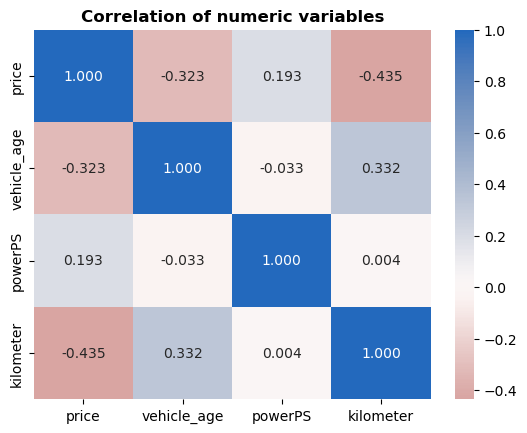

In [393]:
selected_columns = ['price', 'vehicle_age', 'powerPS', 'kilometer']
sns.heatmap(cars_df_clean[selected_columns].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Correlation of numeric variables', weight = 'bold')
plt.show()

>We can understand from the plot that the variable 'price' shows a moderate negative correlation with both 'vehicle_age' (-0.323) and 'kilometer' (-0.435). This indicates that as the age of the vehicle or the distance it has been driven (kilometer) increases, the price tends to decrease. The correlation between 'kilometer' and 'vehicle_age' (0.332) is positive, suggesting that as a car gets older, it is likely to have accumulated more kilometers. For the remaining pairs of variables, the correlation coefficients are close to zero, indicating a weak or negligible correlation. However, there is a weak positive correlation between 'price' and 'powerPS' (0.193), suggesting that vehicles with higher power output tend to have slightly higher prices, although the correlation is not very strong.

##### Average Price for Each Brand

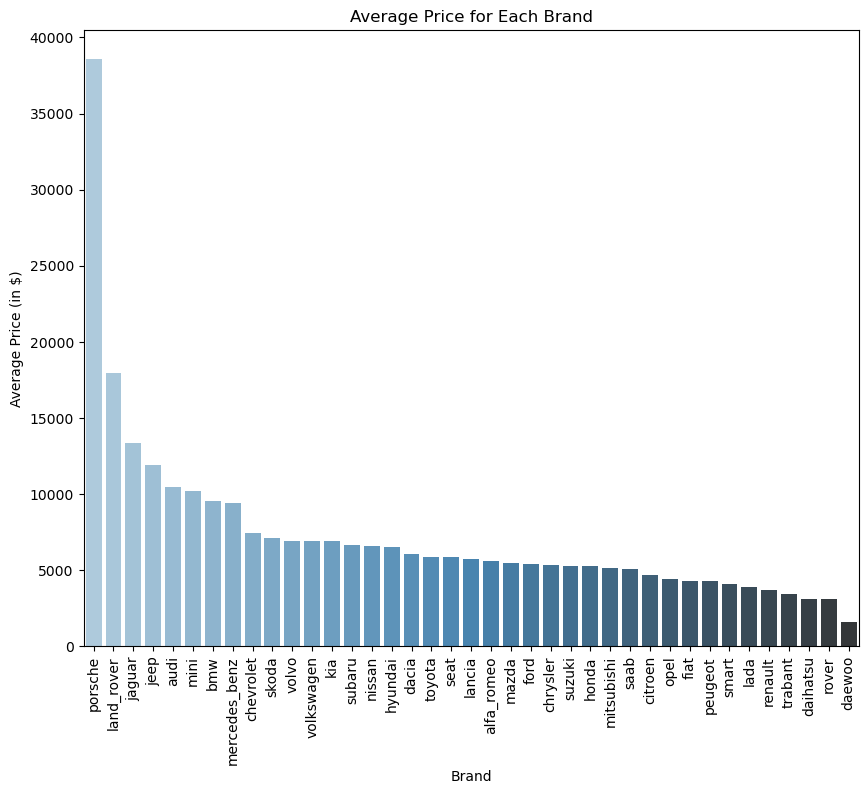

In [394]:
# Calculate the average price for each brand
average_price_per_brand = cars_df_clean.groupby('brand')['price'].mean().sort_values(ascending=False)

# Create a bar plot of the results
plt.figure(figsize=(10, 8))
sns.barplot(x=average_price_per_brand.index, y=average_price_per_brand.values, palette="Blues_d")
plt.title('Average Price for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (in $)')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


> Based on the plot, it is evident that the brand with the highest average price is Porsche. The average price for Porsche vehicles stands out prominently compared to other brands in the dataset.

#####  Average Price for Each Vehicle Type

In [395]:
# Calculate the average price for each vehicle type
average_price_per_vehicle_type = cars_df_clean.groupby('vehicleType')['price'].mean().sort_values(ascending=False)
print(average_price_per_vehicle_type)

vehicleType
suv              13981.146435
coupe            12310.712462
convertible      11008.790157
bus               7446.474330
station wagon     7123.605155
limousine         6929.804728
other             5596.148741
small car         4124.728664
Name: price, dtype: float64


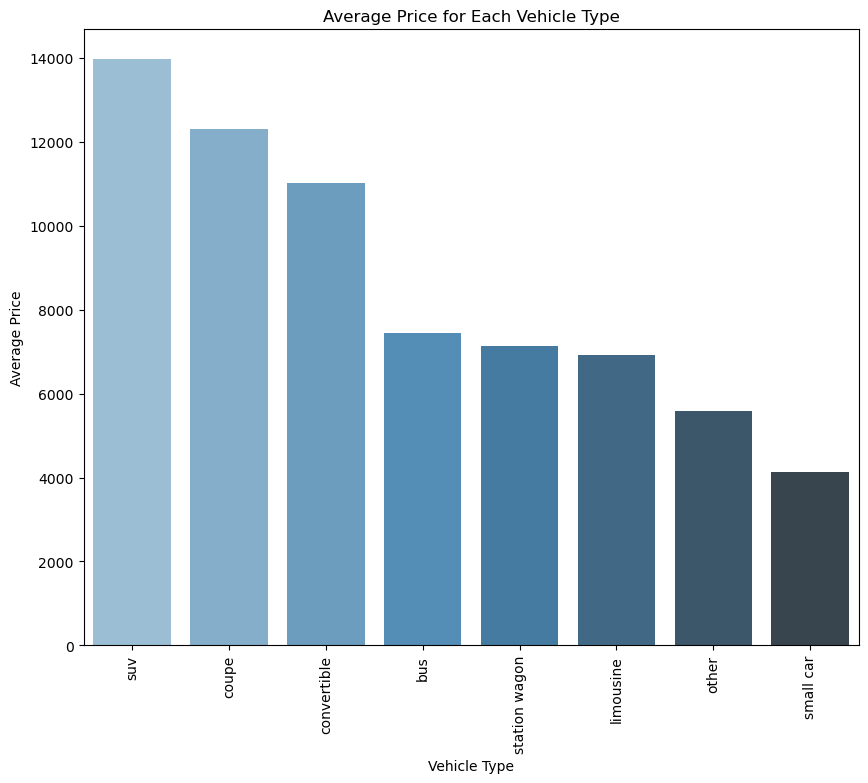

In [396]:
# Create a bar plot of the results
plt.figure(figsize=(10, 8))
sns.barplot(x=average_price_per_vehicle_type.index, y=average_price_per_vehicle_type.values, palette="Blues_d")
plt.title('Average Price for Each Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

>Based on the plot, we can observe that the average vehicle prices vary significantly depending on the vehicle type. The "suv" category has the highest average price at suv 13.981.

In [397]:
# Count the frequency of each model and select the top 10
top_10_models = cars_df_clean['model'].value_counts().head(10)
print(top_10_models)

golf        20527
andere      18251
3er         15954
a4           8031
passat       7607
5er          7301
c_klasse     7172
polo         6959
astra        6621
e_klasse     6355
Name: model, dtype: int64


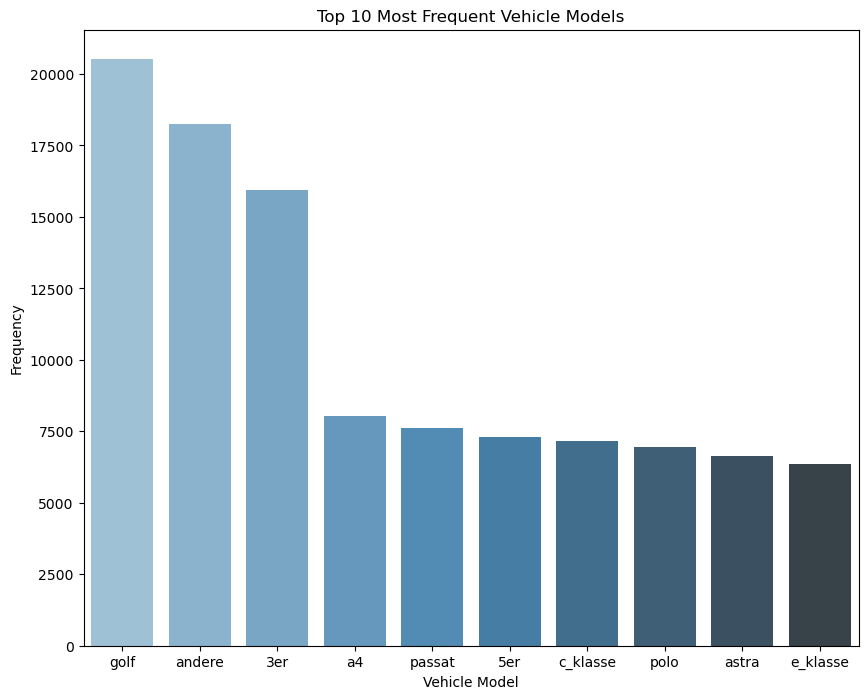

In [398]:
# Create a bar plot of the results
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_models.index, y=top_10_models.values, palette="Blues_d")
plt.title('Top 10 Most Frequent Vehicle Models')
plt.xlabel('Vehicle Model')
plt.ylabel('Frequency')
plt.show()

>Based on the given information, the most frequently occurring vehicle model among the top 15 is "golf" with a count of 20.527 followed by "andere". The other models in the list, such as "3er," "polo," "corsa," "astra," "a4," "passat," "c_klasse," and "5er," also occur frequently but with lower counts compared to "golf" and "andere."

##### Frequency of Gearbox Types

In [399]:
# Calculate the frequency of each gearbox type
gearbox_counts = cars_df_clean['gearbox'].value_counts()

#Calculate the percentages of gearboxs
print((gearbox_counts / len(cars_df_clean)) * 100)

manual       74.491675
automatic    25.508325
Name: gearbox, dtype: float64


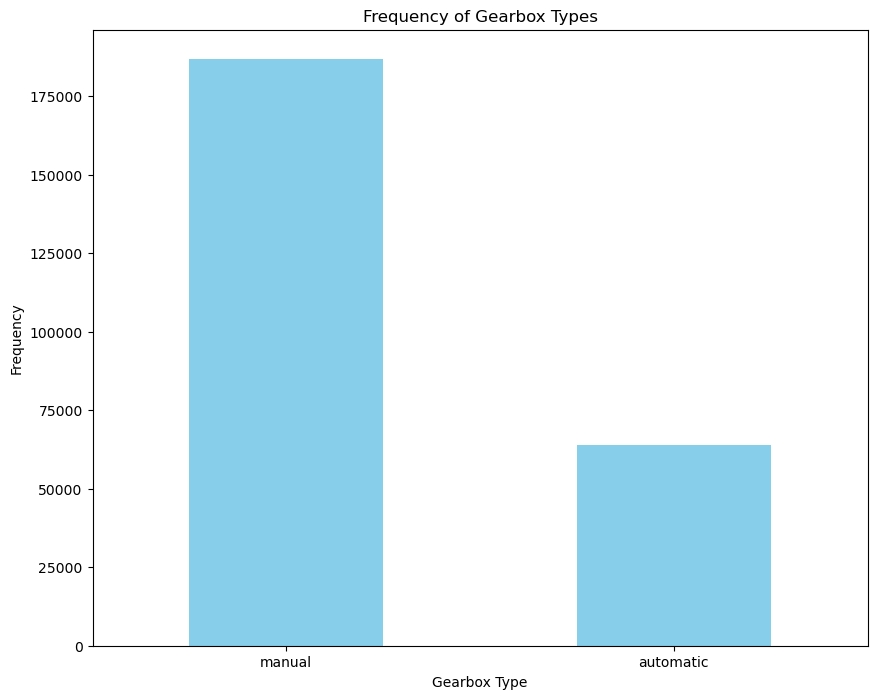

In [400]:
#Making the plot
plt.figure(figsize=(10, 8))
gearbox_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Gearbox Types')
plt.xlabel('Gearbox Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


> A whooping 75% of vehicles have manual gearbox

##### How is vehicle age distributed?

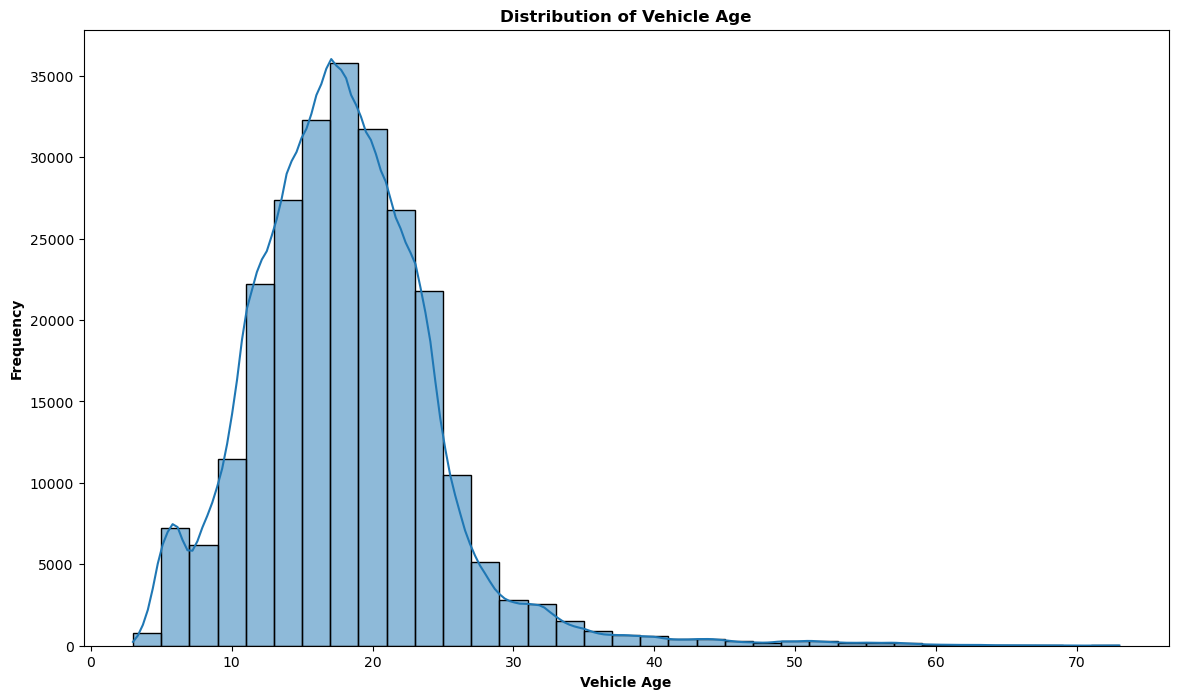

In [401]:
# histogram of vehicle age
plt.figure(figsize=[14, 8])
sns.histplot(data = cars_df_clean, x = 'vehicle_age', binwidth = 2, kde = True)
plt.xlabel('Vehicle Age', weight = 'bold')
plt.ylabel('Frequency', weight = 'bold')
plt.title('Distribution of Vehicle Age', weight = 'bold');

> Distribution skewed to the right. The bulk of vehicles are in the 5 to 25 year old range. There is a long tail to the right leading out to the 70 year-old range.

##### How is vehicle age distributed?

In [402]:
# mean of vehicle price
cars_df_clean.price.mean()

7473.4961167990305

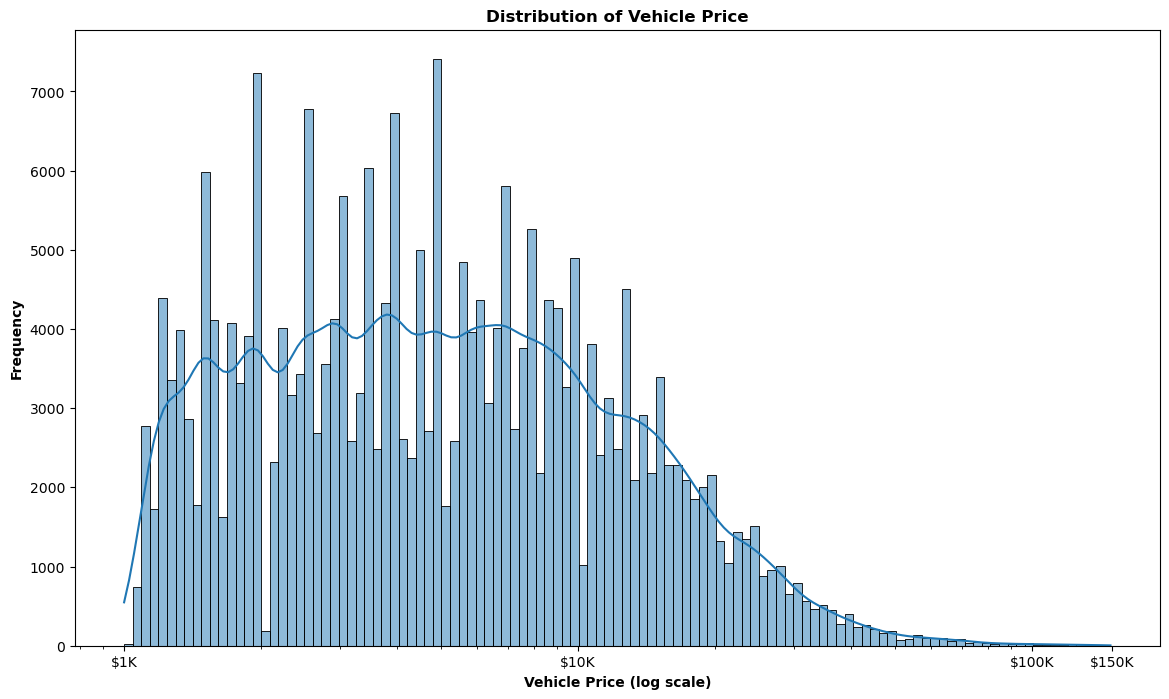

In [403]:
# histogram of vehicle price
plt.figure(figsize=[14, 8])
sns.histplot(data = cars_df_clean, x = 'price', log_scale = True, kde = True)
plt.xlabel('Vehicle Price (log scale)', weight = 'bold')
plt.xticks([1000, 10000, 100000, 150000],
           ['$1K', '$10K', '$100K', '$150K'])
plt.ylabel('Frequency', weight = 'bold')
plt.title('Distribution of Vehicle Price', weight = 'bold');

> The mean price is 6.247. This distirbution is multi-model is right_skewed.

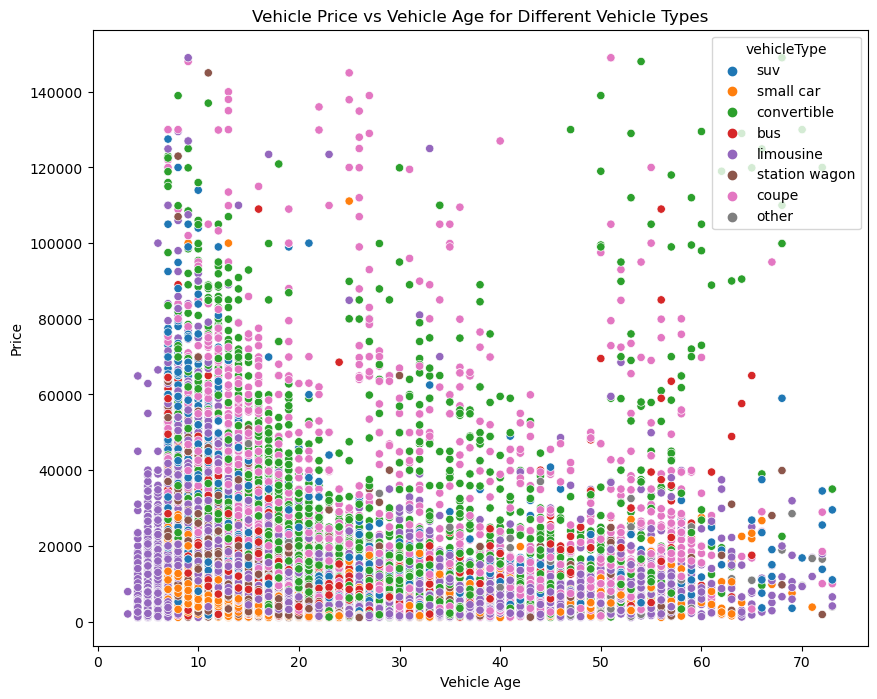

In [404]:
#Create a scatter plot of vehicle price vs. vehicle age with different drive types
plt.figure(figsize=(10, 8))
sns.scatterplot(x='vehicle_age', y='price', hue='vehicleType', data=cars_df_clean)
plt.title('Vehicle Price vs Vehicle Age for Different Vehicle Types')
plt.xlabel('Vehicle Age')
plt.ylabel('Price')
plt.show()


> Based on the plot, we can observe that convertible and some coupe cars retain their value over time. On the other hand, we see that SUVs are expensive when they are relatively new, but their prices decrease as they age. Small cars and limousines generally have lower prices across all ages.

In [405]:
cars_df_clean.head()        

,name,seller,offerType,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,dateOfRegistration,vehicle_age
2,"Jeep_Grand_Cherokee_""Overland""",private,Angebot,9800,suv,automatic,163,grand,125000,diesel,jeep,unknown,90480,2004-08-01,18
3,GOLF_4_1_4__3TÜRER,private,Angebot,1500,small car,manual,75,golf,150000,gasoline,volkswagen,no,91074,2001-06-01,22
4,Skoda_Fabia_1.4_TDI_PD_Classic,private,Angebot,3600,small car,manual,69,fabia,90000,diesel,skoda,no,60437,2008-07-01,15
6,Peugeot_206_CC_110_Platinum,private,Angebot,2200,convertible,manual,109,2_reihe,150000,gasoline,peugeot,no,67112,2004-08-01,18
8,Ford_C___Max_Titanium_1_0_L_EcoBoost,private,Angebot,14500,bus,manual,125,c_max,30000,gasoline,ford,unknown,94505,2014-08-01,8
